# Decision Tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import a dataset from sklearn 
from sklearn.datasets import load_breast_cancer

In [4]:
X,y=load_breast_cancer(return_X_y=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [8]:
clf=DecisionTreeClassifier(random_state=0)# by default critrion is gini

In [9]:
# model building without post-Pruning

In [10]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
y_train_pred=clf.predict(X_train)

y_test_pred=clf.predict(X_test)

train_accuracy=accuracy_score(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_test_pred)

print("Training accuracy" ,train_accuracy)
print("Testing accuracy" ,test_accuracy)

Training accuracy 1.0
Testing accuracy 0.8811188811188811


In [12]:
# drawing a tree

In [13]:
from sklearn import tree

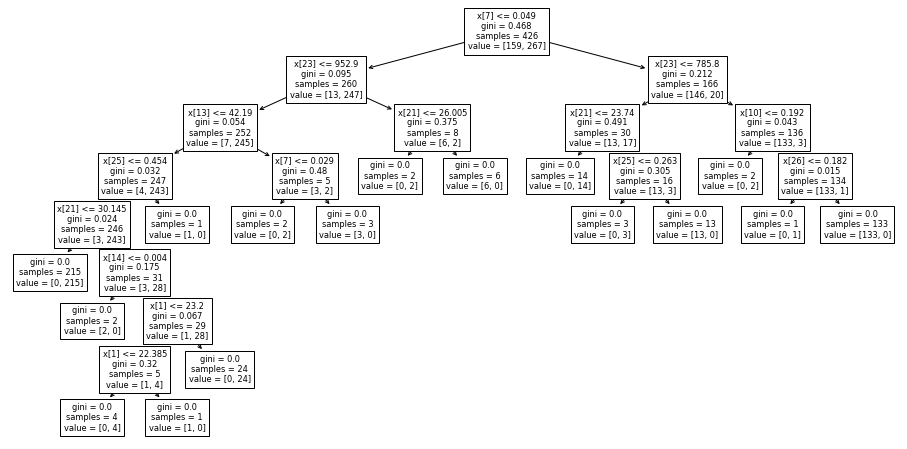

In [14]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()

In [15]:
clf1=DecisionTreeClassifier(random_state=0,criterion='entropy')# by default criterion is gini

In [16]:
clf1.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_train_pred=clf1.predict(X_train)

y_test_pred=clf1.predict(X_test)

train_accuracy=accuracy_score(y_train,y_train_pred)

test_accuracy=accuracy_score(y_test,y_test_pred)

print("Training accuracy" ,train_accuracy)
print("Testing accuracy" ,test_accuracy)

Training accuracy 1.0
Testing accuracy 0.958041958041958


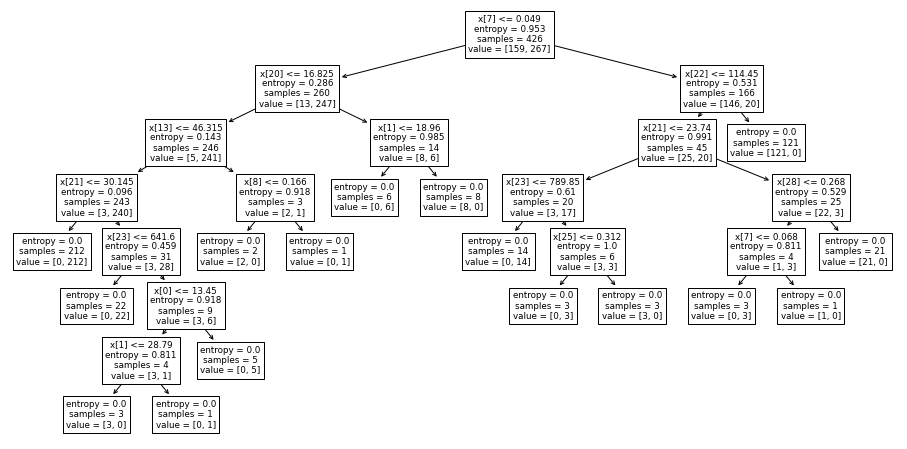

In [18]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf1)
plt.show()

# to understand the pruning concept 

Post-Pruning operation :

Here we use cost_complexity_pruning technique to prune the branches of decision tree.

#cost complexity parameter
# alpha parameter
it help us to prun the tree w.r.to "weakest link" where the nodes with smallest effect , it will 
pruned first.

ccp_alphas gives minimum leaf value of decision tree and 
each ccp_aphas will create different - different classifier 
and choose best out of it.ccp_alphas will be added as a parameter 
in DecisionTreeClassifier()

Cost-complexity parameter
In scikit-learns DecisionTreeClassifier, 
ccp_alpha Is the cost-complexity parameter. 
Essentially, pruning recursively finds the node with 
the “weakest link.” The weakest link is characterized 
by an effective alpha, where the nodes with the 
smallest effective alpha are pruned first.

In [20]:
path=clf.cost_complexity_pruning_path(X_train,y_train)

In [ ]:
#cost complexity prunning path function gives two things ccp_alphas and impurities

In [21]:
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha value",ccp_alphas)
print("Impurities in DT",impurities)

ccp alpha value [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
Impurities in DT [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


In [22]:
dt_prunning=[]# will store all the values
for x in ccp_alphas:
    dt=DecisionTreeClassifier(random_state=0,ccp_alpha=x)
    dt.fit(X_train,y_train)
    dt_prunning.append(dt)

In [23]:
train_scores=[dt.score(X_train,y_train)for dt in dt_prunning]
test_scores=[dt.score(X_test,y_test)for dt in dt_prunning]

# Visualizing the accuracy score w.r.to alpha for train and test set.

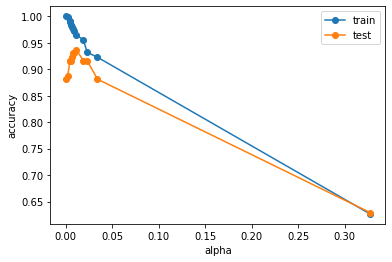

In [24]:
import matplotlib.pyplot as plt
#fig,ax=plt.subplots()
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(ccp_alphas,train_scores,label="train",marker="o")
plt.plot(ccp_alphas,test_scores,label="test",marker="o")
plt.legend()

In [ ]:
#here the best alpha value is 0.02 for tree prunning 

In [26]:
dt_final=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
dt_final.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

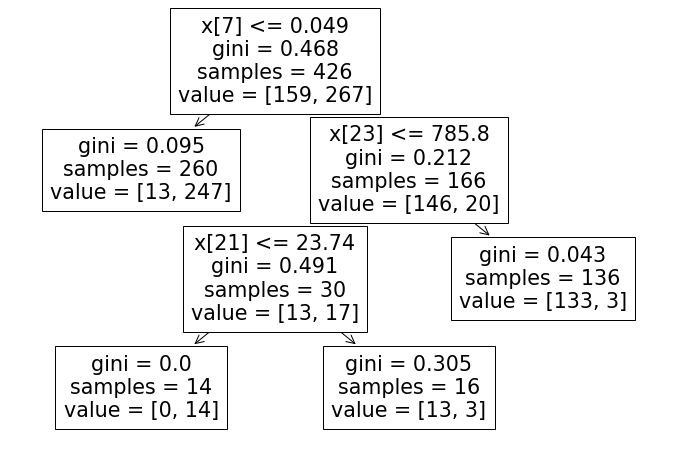

In [27]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt_final)
plt.show()

In [32]:
print("Testing_accuracy", accuracy_score(y_test,dt_final.predict(X_test)))

Testing_accuracy 0.916083916083916


In [31]:
print("Training_accuracy",accuracy_score(y_train,dt_final.predict(X_train)))

Training_accuracy 0.9553990610328639


 HYPERPARAMETER TUNNING 
(1)GRID SEARCH CV------it work throughly.. much minute level and try all combination of parameters
(2)RANDOMIZED SEARCH CV---it select random parameter
in general situation we find the same accuracy
 Grid search method is more better but computational time is high